In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `scripts/stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

In [4]:
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

### Task 0: Joining two data frames.

First, we take note of the dimensions of each dataframes.

In [5]:
print('strava', strava.shape)
print('cheetah', cheetah.shape)

strava (268, 10)
cheetah (251, 362)


We notice that the two dataframes have indices of type `DatetimeIndex`, but they are not set in the same time zone. The time in `cheetah` is in `'Australia/Sydney'` time zone. We fix the problem by converting the time zone of the time in `strava` dataframe into the same time zone.

In [6]:
import pytz
sydney = pytz.timezone('Australia/Sydney')
strava.index = strava.index.tz_convert(sydney)
print(cheetah.Duration)
print(strava.elapsed_time)

2018-01-28 06:39:49+11:00     1053
2018-01-28 07:01:32+11:00     4062
2018-02-01 08:13:34+11:00    38977
2018-02-06 08:06:42+11:00     4151
2018-02-07 17:59:05+11:00     8659
                             ...  
2019-07-20 06:22:49+10:00    10472
2019-07-27 06:12:56+10:00    11150
2019-07-28 06:42:59+10:00     2977
2019-07-28 07:47:24+10:00     3015
2019-07-28 09:55:13+10:00     4130
Name: Duration, Length: 251, dtype: int64
date
2018-01-03 07:47:51+11:00     94
2018-01-04 12:36:53+11:00     52
2018-01-04 13:56:00+11:00      3
2018-01-04 16:37:04+11:00     77
2018-01-06 06:22:46+11:00    189
                            ... 
2019-07-20 06:22:49+10:00    174
2019-07-27 06:12:56+10:00    185
2019-07-28 06:42:59+10:00     49
2019-07-28 07:47:24+10:00     50
2019-07-28 09:55:13+10:00     68
Name: elapsed_time, Length: 268, dtype: int64


We make a list of the names of the columns in `cheetah` dataframe that are also present in the `strava` dataframe with different names.

In [7]:
column_names = [
    'Duration',
    'Time Moving',
    'Average Power',
    'Average Heart Rate',
    'Average Temp'
]

Now, we join the two dataframes. we use `strava.join` function with these arguments:
- `cheetah`: name of the second dataframe we want to join
- `how`: the type of join. Here we specify that we want `inner` join, meaning that the rows that appear in neither dataframes will be dropped.

In [8]:
joined = strava.join(cheetah, how='inner')

In [9]:
joined.shape

(243, 372)

Finally, we remove the redundant data.

In [10]:
joined = joined.drop(columns=column_names)

Now we can observe our new dataframe.

In [11]:
joined

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-01 08:13:34+11:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


### Task 1: Removal of rides with no measured power

In [12]:
filtered = joined[ joined['device_watts'] == True ]
filtered

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-10 06:18:03+11:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


### Task 2: Shape of distribution of some key variables

Variables `elapsed_time`, `distance`, `Average Speed`, `average_watts`, and `TSS` are plotted in a graph. These variables show no sign of a normal distribution over time.

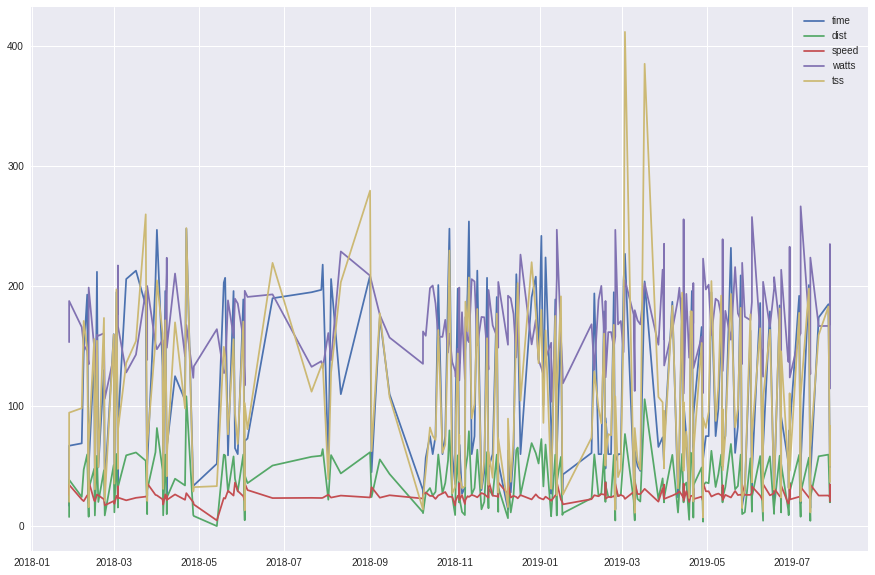

In [13]:
plt.figure(figsize=(15,10))
plt.plot(filtered.elapsed_time, label='time')
plt.plot(filtered.distance, label='dist')
plt.plot(filtered['Average Speed'], label='speed')
plt.plot(filtered.average_watts, label='watts')
plt.plot(filtered.TSS, label='tss')
plt.legend()

### Task 3: Relations between variables

There is, obviously, a linear relation between `distance` and `moving_time`, which can be observed in the graph.

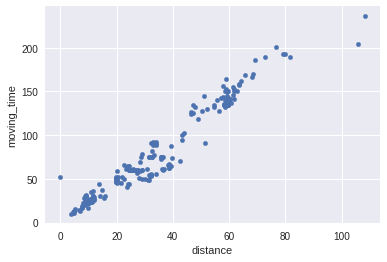

In [14]:
filtered.plot.scatter('distance', 'moving_time')

There is a proportional relation between `NP` and `average_heartrate`, which is not strictly linear. A straight regression line on this graph would intersect the `average_heartrate` axis at around 100.

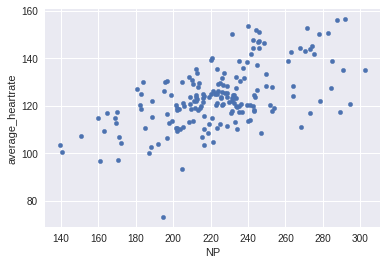

In [15]:
filtered.plot.scatter('NP', 'average_heartrate')

The variables `average_watts` and `NP` have a more linear relation, since both these variables denote power.

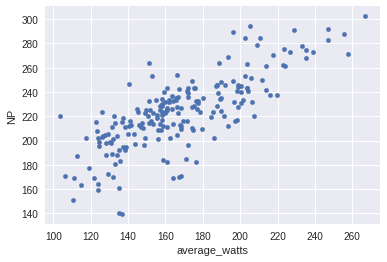

In [16]:
filtered.plot.scatter('average_watts', 'NP')

Relations of `TSS` with respect to `NP`, `average_heartrate`, `elevation_gain`, and `distance` were plotted. The relation between `TSS` and each of the first three was inconclusive. But it looks like `TSS` and `distance` have a near-linear relation. Therefore, since `TSS` is a measure of how hard a ride it was, `distance` is also a good indicator of the degree of the hardship of the ride

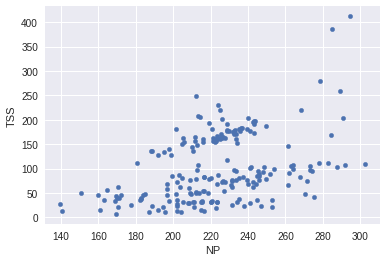

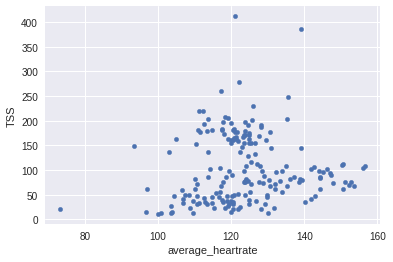

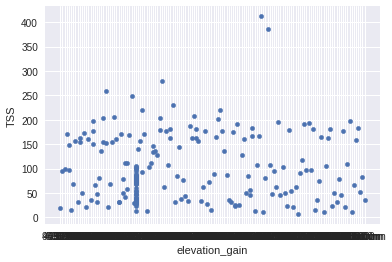

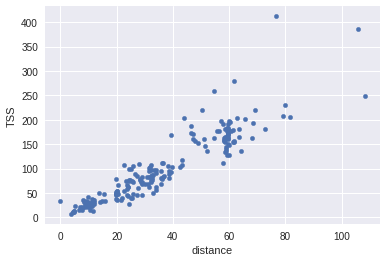

In [17]:
filtered.plot.scatter('NP', 'TSS')
filtered.plot.scatter('average_heartrate', 'TSS')
filtered.plot.scatter('elevation_gain', 'TSS')
filtered.plot.scatter('distance', 'TSS')

### Task 4: NP for races and rides

First, we filter out the races and the rides from all the workouts.

In [18]:
races = filtered[ filtered.workout_type == 'Race' ]
rides = filtered[ filtered.workout_type == 'Ride' ]

Then, we look at the statistics of the `NP` values of both these data frames.

In [19]:
display(races.NP.describe())
display(rides.NP.describe())

count     29.000000
mean     259.659103
std       18.503989
min      231.614000
25%      245.365000
50%      261.378000
75%      273.058000
max      302.396000
Name: NP, dtype: float64

count    151.000000
mean     216.283397
std       27.934810
min      139.591000
25%      201.938500
50%      216.392000
75%      231.767000
max      294.308000
Name: NP, dtype: float64

It looks like races overall have higher statistics than rides: higher mean, min, and max values. The minimum `NP` value for races is higher than nearly 75% of those for rides.

Furthermore, the following graph confirms that races have usually higher `NP` values than rides. This means that races are in fact more challenging than rides in general.

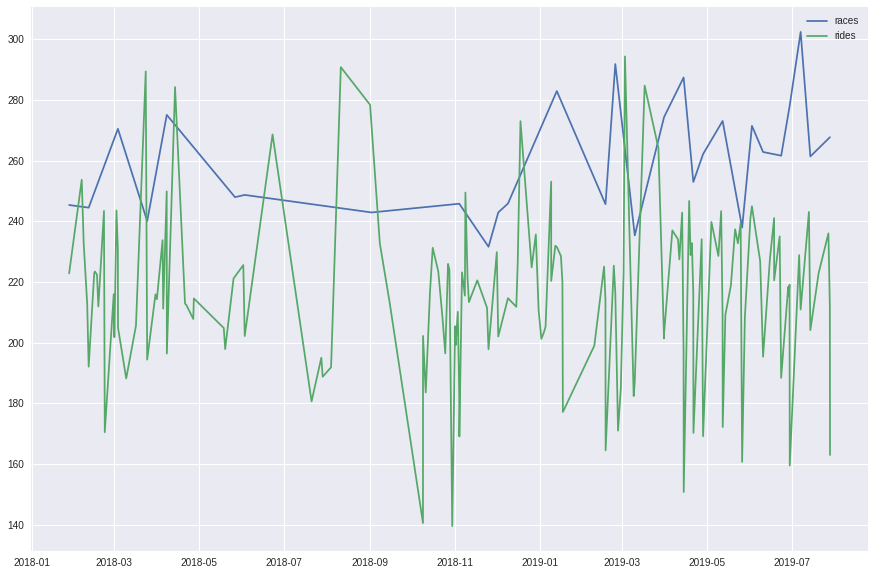

In [20]:
plt.figure(figsize=(15,10))
plt.plot(races.NP, label='races')
plt.plot(rides.NP, label='rides')
plt.legend()